In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import matplotlib.ticker as mtick
import os.path
from google.colab import files

# Objetivos:

*   Aprofundar nos dados da Baixada e da intervenção do Exército no Rio de Janeiro.
*   **Comparar os dados gerais do Rio com a percepção de violência na época da intervenção militar.** ❗

In [104]:
# Carregando DataFrame
df_estados = pd.read_csv('/content/drive/Shareddrives/ODTE/Scripts/Análise de dados/taxa-homicidios.csv', delimiter=';')
df_estados.rename(columns = {'nome':'estado', 'período':'ano', 'valor':'taxa'}, inplace = True)
df_estados

,cod,estado,ano,taxa
0,33,RJ,1980,26.05
1,35,SP,1980,13.76
2,41,PR,1980,10.89
3,31,MG,1980,8.70
4,29,BA,1980,3.37
5,28,SE,1980,7.19
6,25,PB,1980,10.90
7,24,RN,1980,8.58
8,23,CE,1980,8.41
9,22,PI,1980,2.34


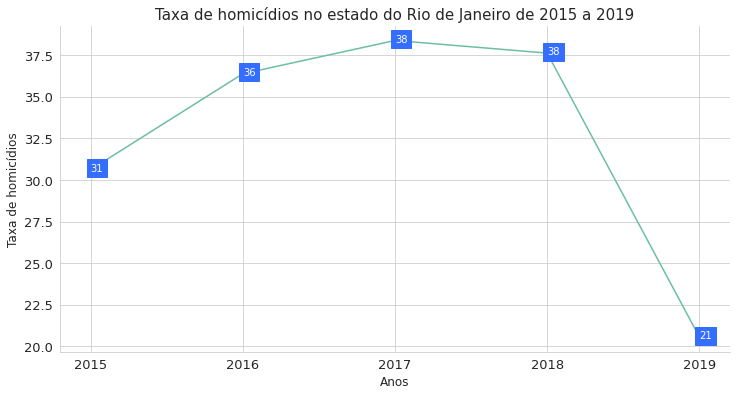

In [105]:
# Gráfico da taxa de homicídios do estado do RJ de 2015 a 2019
fig, ax = plt.subplots(figsize =(12, 6))
df_taxa_rj = df_estados[(df_estados['ano'] >= 2015) & (df_estados['estado'] == 'RJ')]
anos = range(2015,2020)
for x, y in zip(anos, df_taxa_rj['taxa']):
  plt.text(x = x, y = y - 0.1, s = f'{y:.0f}', color='white').set_backgroundcolor('#336EFF')
sns.lineplot(data=df_taxa_rj, x='ano', y='taxa', marker='o')
sns.despine()
plt.ylabel('Taxa de homicídios', fontsize= 12)
plt.xlabel('Anos', fontsize= 12)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title('Taxa de homicídios no estado do Rio de Janeiro de 2015 a 2019', fontsize= 15)
plt.xticks(anos)
plt.savefig('taxa_hom_rj.png')
plt.show()

In [106]:
# Carregando DataFrame de números absolutos de homícios no RJ

df_absoluto = pd.read_csv('/content/drive/Shareddrives/ODTE/Scripts/Análise de dados/homicios-absoluto.csv', delimiter=';', skiprows=1, index_col=0)
df_absoluto.columns = ['codigo',	'estado',	2015,	2016,	2017,	2018,	2019, 2020, 'nan']
df_absoluto = df_absoluto.drop('nan', axis=1)

In [107]:
# Números absolutos de homicídios no estado do RJ entre 2015 e 2019

df_absoluto_rj = df_absoluto[df_absoluto['estado'] == 'Rio de Janeiro']
df_absoluto_rj = df_absoluto_rj.transpose().reset_index().rename(columns={'index':'ano', 'RJ':'homicidios'}).rename_axis('index', axis=1).drop([0, 1], axis=0)
df_absoluto_rj = df_absoluto_rj.reset_index().drop('index', axis=1)

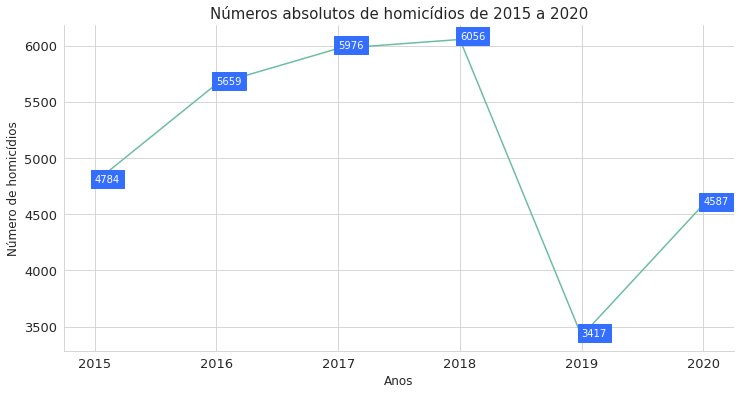

In [108]:
# Gráfico da evolução de quantidade de homicídios no período de 2015 a 2020

fig, ax = plt.subplots(figsize =(12, 6))
anos = range(2015,2021)
for x, y in zip(anos, df_absoluto_rj['homicidios']):
  plt.text(x = x, y = y - 0.1, s = f'{y:.0f}', color='white').set_backgroundcolor('#336EFF')
sns.lineplot(data=df_absoluto_rj, x='ano', y='homicidios', marker='o')
sns.despine()
plt.ylabel('Número de homicídios', fontsize= 12)
plt.xlabel('Anos', fontsize= 12)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title('Números absolutos de homicídios de 2015 a 2020', fontsize= 15)
plt.xticks(anos)
plt.savefig('hom_absolutos.png')
plt.show()

# Carregando e limpando dados

In [109]:
# Carregando e limpando dados

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_intervencao_medo = pd.read_csv('/content/drive/Shareddrives/ODTE/Scripts/Análise de dados/intervencao_medo.csv')


In [110]:
#Renomeando colunas

df_intervencao_medo = df_intervencao_medo.rename(columns={'P.11 Você diria que tem medo de...\nP.12 Se sim, muito medo ou pouco medo ?\n(Resposta estimulada e única, em %)':'pergunta',
                                                            'Unnamed: 1':'delete1',
                                                            'Unnamed: 2':'grau_medo',
                                                            'Unnamed: 3':'metricas',
                                                            'Unnamed: 4':'total',
                                                            'Unnamed: 5':'sexo_masc',
                                                            'Unnamed: 6':'sexo_fem',
                                                            'Unnamed: 7':'id_16_24',
                                                            'Unnamed: 8':'id_25_34',
                                                            'Unnamed: 9':'id_35_44',
                                                            'Unnamed: 10':'id_45_59',
                                                            'Unnamed: 11':'id_60_mais',
                                                            'Unnamed: 12':'esc_fundamental',
                                                            'Unnamed: 13':'esc_medio',
                                                            'Unnamed: 14':'esc_superior',
                                                            'Unnamed: 15':'renda_2sm',
                                                            'Unnamed: 16':'renda_2_5_sm',
                                                            'Unnamed: 17':'renda_2_10_sm',
                                                            'Unnamed: 18':'renda_10_mais_sm',
                                                            'Unnamed: 19':'pea',
                                                            'Unnamed: 20':'nao_pea',
                                                            'Unnamed: 21':'cor_parda',
                                                            'Unnamed: 22':'cor_branca',
                                                            'Unnamed: 23':'cor_preta',
                                                            'Unnamed: 24':'sim_com',
                                                            'Unnamed: 25':'nao_com'
                                                            })

In [111]:
# Excluindo linhas indesejadas

df_intervencao_medo = df_intervencao_medo.drop([0,1], axis=0)

# Deletando colunas indesejadas

df_intervencao_medo = df_intervencao_medo.drop(['delete1'], axis=1)

In [112]:
#Renomeando coluna 'pergunta'

def renomear_pergunta():
  for linhas in df_intervencao_medo['pergunta']:
    nova_coluna = df_intervencao_medo['pergunta'].fillna(method="ffill")
    df_intervencao_medo['pergunta'] = nova_coluna
    return df_intervencao_medo

# Renomeando coluna 'grau_medo'

df_intervencao_medo = renomear_pergunta()
df_intervencao_medo['grau_medo'] = df_intervencao_medo['grau_medo'].str.upper()

novo_valor = {'***':'TOTAL EM PORCENTAGEM'}
df_intervencao_medo = df_intervencao_medo.replace({'grau_medo': novo_valor})



In [113]:
# Convertendo colunas em int e str

df_intervencao_medo[['grau_medo', 'pergunta']] = df_intervencao_medo[['grau_medo', 'pergunta']].astype(pd.StringDtype())
df_intervencao_medo[['sexo_masc', 'sexo_fem', 'id_16_24', 'id_25_34', 'id_35_44', 'id_45_59', 'id_60_mais', "esc_fundamental", 'esc_medio', 'esc_superior', 'renda_2sm', 'renda_2_5_sm', 'renda_2_10_sm', 'renda_10_mais_sm', 'pea', 'nao_pea', 'cor_parda',	'cor_branca',	'cor_preta', 'sim_com', 'nao_com']] = df_intervencao_medo[['sexo_masc', 'sexo_fem', 'id_16_24', 'id_25_34', 'id_35_44', 'id_45_59', 'id_60_mais', "esc_fundamental", 'esc_medio', 'esc_superior', 'renda_2sm', 'renda_2_5_sm', 'renda_2_10_sm', 'renda_10_mais_sm', 'pea', 'nao_pea', 'cor_parda',	'cor_branca',	'cor_preta', 'sim_com', 'nao_com']].apply(pd.to_numeric, errors='coerce')
df_intervencao_medo = df_intervencao_medo.dropna(subset=['sexo_masc', 'sexo_fem', 'id_16_24', 'id_25_34', 'id_35_44', 'id_45_59', 'id_60_mais', "esc_fundamental", 'esc_medio', 'esc_superior', 'renda_2sm', 'renda_2_5_sm', 'renda_2_10_sm', 'renda_10_mais_sm', 'pea', 'nao_pea', 'cor_parda',	'cor_branca',	'cor_preta', 'sim_com', 'nao_com'])
df_intervencao_medo[['sexo_masc', 'sexo_fem', 'id_16_24', 'id_25_34', 'id_35_44', 'id_45_59', 'id_60_mais', "esc_fundamental", 'esc_medio', 'esc_superior', 'renda_2sm', 'renda_2_5_sm', 'renda_2_10_sm', 'renda_10_mais_sm', 'pea', 'nao_pea', 'cor_parda',	'cor_branca',	'cor_preta', 'sim_com', 'nao_com']] = df_intervencao_medo[['sexo_masc', 'sexo_fem', 'id_16_24', 'id_25_34', 'id_35_44', 'id_45_59', 'id_60_mais', "esc_fundamental", 'esc_medio', 'esc_superior', 'renda_2sm', 'renda_2_5_sm', 'renda_2_10_sm', 'renda_10_mais_sm', 'pea', 'nao_pea', 'cor_parda',	'cor_branca',	'cor_preta', 'sim_com', 'nao_com']].astype('int64')
df_intervencao_medo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 2 to 193
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pergunta          176 non-null    string
 1   grau_medo         126 non-null    string
 2   metricas          75 non-null     object
 3   total             176 non-null    object
 4   sexo_masc         176 non-null    int64 
 5   sexo_fem          176 non-null    int64 
 6   id_16_24          176 non-null    int64 
 7   id_25_34          176 non-null    int64 
 8   id_35_44          176 non-null    int64 
 9   id_45_59          176 non-null    int64 
 10  id_60_mais        176 non-null    int64 
 11  esc_fundamental   176 non-null    int64 
 12  esc_medio         176 non-null    int64 
 13  esc_superior      176 non-null    int64 
 14  renda_2sm         176 non-null    int64 
 15  renda_2_5_sm      176 non-null    int64 
 16  renda_2_10_sm     176 non-null    int64 
 17  renda_10_mais_sm

In [114]:
colunas = [print(f'{i}') for i in df_intervencao_medo.columns]

# df_intervencao_medo.head(10)

# RENDA, COR, ESCOLARIDADE, COMUNIDADE OU NAO
# 1 - MORRER ASSASSINADO?
# 2 - SE VER NO MEIO DO FOGO CRUZADO DE UM CONFRONTO ENTRE POLICIAIS E BANDIDOS?
# 3 - SER FERIDO OU MORTO EM UM ASSALTO OU ROUBO?
# 4 - SER VÍTIMA DE VIOLÊNCIA POR PARTE DA POLÍCIA MILITAR, AQUELA QUE EXECUTA O POLICIAMENTO FARDADO E OSTENSIVO NAS RUAS? POLICIAMENTO FARDADO E OSTENSIVO NAS RUAS?
# 5 - SER VÍTIMA OU TER UM PARENTE VÍTIMA DE BALA PERDIDA?

pergunta
grau_medo
metricas
total
sexo_masc
sexo_fem
id_16_24
id_25_34
id_35_44
id_45_59
id_60_mais
esc_fundamental
esc_medio
esc_superior
renda_2sm
renda_2_5_sm
renda_2_10_sm
renda_10_mais_sm
pea
nao_pea
cor_parda
cor_branca
cor_preta
sim_com
nao_com


In [115]:
df_intervencao_medo['pergunta'].unique()

<StringArray>
[                                                                                    'TER SUA RESIDÊNCIA INVADIDA OU ARROMBADA?',
                                      'TER OBJETOS PESSOAIS DE VALOR TOMADOS A FORÇA POR OUTRAS PESSOAS EM UM ROUBO OU ASSALTO?',
                                                                                      'TER SEU CARRO OU MOTO TOMADO DE ASSALTO?',
                                                                'SE ENVOLVER EM BRIGAS OU AGRESSÕES FÍSICAS COM OUTRAS PESSOAS?',
                                                                                                           'MORRER ASSASSINADO?',
                                                                                                           'DE SER SEQUESTRADO?',
                                                                                                'DE SOFRER SEQUESTRO RELÂMPAGO?',
                                                                            

# Funções

In [116]:
# Seleção de colunas

def selecao_df(pergunta):
  df_limpo = df_intervencao_medo[df_intervencao_medo['pergunta'] == pergunta]
  return df_limpo

# Calcular porcentagem

# def porcentagem(df, coluna):
#   porcentagem = [valor*100/df[coluna].sum() for valor in df[coluna]]
#   df[coluna] = porcentagem
#   return df

# Aplicar função melt

def melted_df(df, var):
  df_melted = df.melt('grau_medo', var_name = var, value_name='valor')
  return df_melted

# Plotar gráfico

def grafico_idade(df, title):
  ax, fig = plt.subplots(figsize=(10, 5))
  ax = sns.barplot(data=df, x='idade', y = 'valor', hue='grau_medo')
  plt.yticks(range(10, 101, 10), fontsize=10)
  plt.xticks([0, 1, 2, 3, 4], ['16-24', '25-34', '35-44', '45-59', '60 ou mais'], fontsize=11)
  sns.set_style('whitegrid')
  sns.set_palette('Set2', desat=0.9)
  sns.despine()
  plt.title(f'Grau de medo de {title}, separado por grupos de idade', fontsize=16)
  plt.legend(title='Grau de medo', fontsize=10, title_fontsize=12)
  plt.ylabel('% de pessoas entrevistadas', fontsize=13)
  plt.xlabel('Grupos de idade', fontsize=13)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
  if os.path.isfile('graph_idade.png') == True:
    plt.savefig('graph_idade_1.png')
  else:
    plt.savefig('graph_idade.png')
  plt.show()

def grafico_cor(df, title):
  ax, fig = plt.subplots(figsize=(10, 5))
  sns.barplot(data=df, x='cor', y = 'valor', hue='grau_medo')
  plt.yticks(range(10, 101, 10), fontsize=10)
  plt.xticks([0, 1, 2], ['Pardos', 'Brancos', 'Pretos'], fontsize=12)
  sns.set_style('whitegrid')
  sns.set_palette('Set2', desat=0.9)
  sns.despine()
  plt.title(f'Grau de medo de {title}, separado por raça/cor', fontsize=16)
  plt.legend(title='Grau de medo', fontsize=10, title_fontsize=12)
  plt.ylabel('% de pessoas entrevistadas', fontsize=13)
  plt.xlabel('Raça/cor', fontsize=13)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
  if os.path.isfile('graph_cor.png') == True:
    plt.savefig('graph_cor_1.png')
  else:
    plt.savefig('graph_cor.png')
  plt.show()

def grafico_escolaridade(df, title):
  ax, fig = plt.subplots(figsize=(10, 5))
  sns.barplot(data=df, x='escolaridade', y = 'valor', hue='grau_medo')
  plt.yticks(range(10, 101, 10), fontsize=10)
  plt.xticks([0, 1, 2], ['Ensino Fundamental', 'Ensino Médio', 'Ensino Superior'], fontsize=12)
  sns.set_style('whitegrid')
  sns.set_palette('Set2', desat=0.9)
  sns.despine()
  plt.title(f'Grau de medo de {title}, separado por nível de escolaridade', fontsize=16)
  plt.legend(title='Grau de medo', fontsize=10, title_fontsize=12)
  plt.ylabel('% de pessoas entrevistadas', fontsize=13)
  plt.xlabel('Nível de escolaridade', fontsize=13)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
  if os.path.isfile('graph_esc.png') == True:
    plt.savefig('graph_esc_1.png')
  else:
    plt.savefig('graph_esc.png')
  plt.show()

def grafico_localidade(df, title):
  ax, fig = plt.subplots(figsize=(10, 5))
  sns.barplot(data=df, x='comunidade', y = 'valor', hue='grau_medo')
  plt.yticks(range(10, 101, 10), fontsize=10)
  plt.xticks([0, 1], ['Sim', 'Não'], fontsize=12)
  sns.set_style('whitegrid')
  sns.set_palette('Set2', desat=0.9)
  sns.despine()
  plt.title(f'Grau de medo de {title}, separado por localidade', fontsize=16)
  plt.legend(title='Grau de medo', fontsize=10, title_fontsize=12)
  plt.ylabel('% de pessoas entrevistadas', fontsize=13)
  plt.xlabel('Reside ou não em comunidade', fontsize=13)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
  if os.path.isfile('graph_com.png') == True:
    plt.savefig('graph_com_1.png')
  else:
    plt.savefig('graph_com.png')
  plt.show()

# Morrer assassinado

**Criação de DataFrames separados por critérios**

In [140]:
#Criação de DataFrame

df_assassinato = selecao_df(pergunta ='MORRER ASSASSINADO?')
df_assassinato = df_assassinato.drop([33, 38, 39, 40], axis=0)

# DataFrame separado por idade

df_assassinato_idade = df_assassinato[['grau_medo', 'id_16_24', 'id_25_34', 'id_35_44', 'id_45_59', 'id_60_mais']]

# Aplicação da função de porcentagem

# df_assassinato_idade = porcentagem(df_assassinato_idade, 'id_16_24')
# df_assassinato_idade = porcentagem(df_assassinato_idade, 'id_25_34')
# df_assassinato_idade = porcentagem(df_assassinato_idade, 'id_35_44')
# df_assassinato_idade = porcentagem(df_assassinato_idade, 'id_45_59')
# df_assassinato_idade = porcentagem(df_assassinato_idade, 'id_60_mais')

# Conversão de colunas em linhas

df_assassinato_id_melt = melted_df(df=df_assassinato_idade, var = 'idade')
df_assassinato_id_melt

,grau_medo,idade,valor
0,MUITO MEDO,id_16_24,79
1,POUCO MEDO,id_16_24,9
2,NÃO TEM MEDO,id_16_24,12
3,MUITO MEDO,id_25_34,83
4,POUCO MEDO,id_25_34,8
5,NÃO TEM MEDO,id_25_34,8
6,MUITO MEDO,id_35_44,79
7,POUCO MEDO,id_35_44,11
8,NÃO TEM MEDO,id_35_44,10
9,MUITO MEDO,id_45_59,77


In [141]:
# DataFrame com respostas separadas por cor/raça

df_assassinato_cor = df_assassinato[['grau_medo','cor_parda', 'cor_branca', 'cor_preta']]

# df_assassinato_cor = porcentagem(df_assassinato_cor, 'cor_parda')
# df_assassinato_cor = porcentagem(df_assassinato_cor, 'cor_branca')
# df_assassinato_cor = porcentagem(df_assassinato_cor, 'cor_preta')

df_assassinato_cor_melt = melted_df(df=df_assassinato_cor, var='cor')
df_assassinato_cor_melt 

,grau_medo,cor,valor
0,MUITO MEDO,cor_parda,83
1,POUCO MEDO,cor_parda,7
2,NÃO TEM MEDO,cor_parda,10
3,MUITO MEDO,cor_branca,73
4,POUCO MEDO,cor_branca,12
5,NÃO TEM MEDO,cor_branca,15
6,MUITO MEDO,cor_preta,79
7,POUCO MEDO,cor_preta,8
8,NÃO TEM MEDO,cor_preta,13


In [119]:
# DataFrame separado por grau de escolaridade

df_assassinato_esc = df_assassinato[['grau_medo', 'esc_fundamental', 'esc_medio', 'esc_superior']]

# df_assassinato_esc = porcentagem(df_assassinato_esc, 'esc_fundamental')
# df_assassinato_esc = porcentagem(df_assassinato_esc, 'esc_medio')
# df_assassinato_esc = porcentagem(df_assassinato_esc, 'esc_superior')

df_assassinato_esc_melt = melted_df(df=df_assassinato_esc, var='escolaridade')

In [120]:
# DataFrame separado por local de moradia

df_assassinato_com = df_assassinato[['grau_medo', 'sim_com', 'nao_com']]

# df_assassinato_com = porcentagem(df_assassinato_com, 'sim_com')
# df_assassinato_com = porcentagem(df_assassinato_com, 'nao_com')

df_assassinato_com_melt = melted_df(df=df_assassinato_com, var='comunidade')

# Gráficos


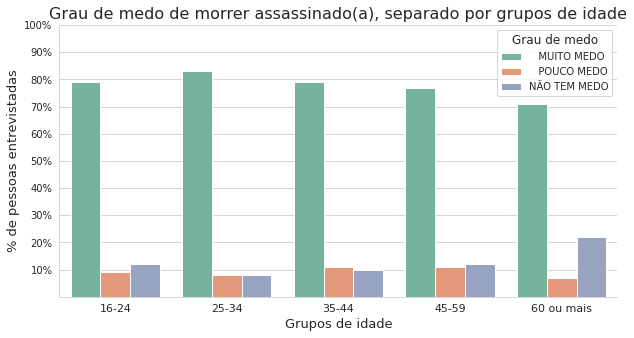

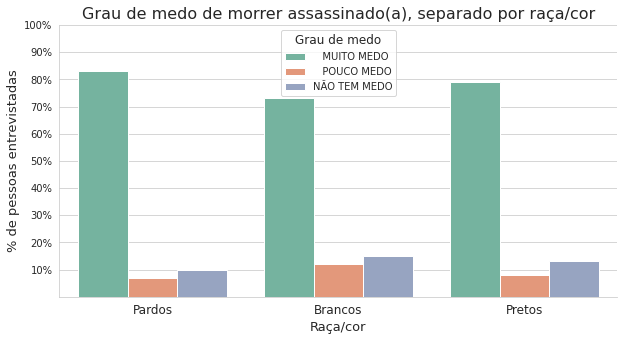

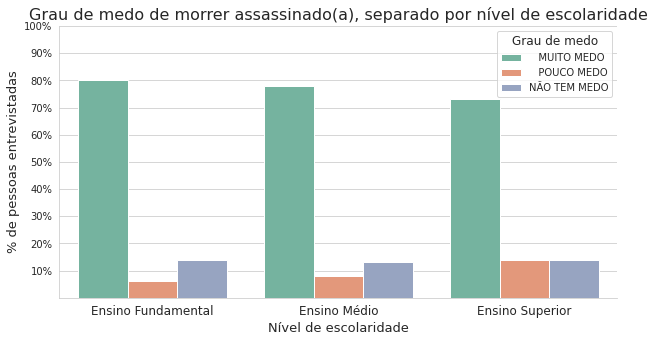

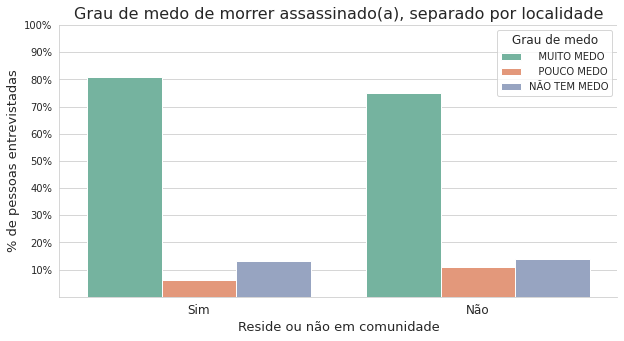

In [142]:
# Idade

grafico_idade(df=df_assassinato_id_melt, title='morrer assassinado(a)')

# Cor/Raça

grafico_cor(df=df_assassinato_cor_melt, title='morrer assassinado(a)')

# Escolaridade

grafico_escolaridade(df=df_assassinato_esc_melt, title='morrer assassinado(a)')

# Localidade
grafico_localidade(df=df_assassinato_com_melt, title='morrer assassinado(a)')


# Ser vítima de violência por parte da polícia militar, aquela que executa o policiamento fardado e ostensivo nas ruas?

**Criação de DataFrames**

In [130]:
#Criação de DataFrame

df_violencia_pol = selecao_df(pergunta ='SER VÍTIMA DE VIOLÊNCIA POR PARTE DA POLÍCIA MILITAR, AQUELA QUE EXECUTA O POLICIAMENTO FARDADO E OSTENSIVO NAS RUAS?')
df_violencia_pol = df_violencia_pol.drop([80, 85, 86, 87], axis=0)

# DataFrame separado por idade

df_violencia_pol_idade = df_violencia_pol[['grau_medo', 'id_16_24', 'id_25_34', 'id_35_44', 'id_45_59', 'id_60_mais']]

# Aplicação da função de porcentagem

# df_violencia_pol_idade = porcentagem(df_violencia_pol_idade, 'id_16_24')
# df_violencia_pol_idade = porcentagem(df_violencia_pol_idade, 'id_25_34')
# df_violencia_pol_idade = porcentagem(df_violencia_pol_idade, 'id_35_44')
# df_violencia_pol_idade = porcentagem(df_violencia_pol_idade, 'id_45_59')
# df_violencia_pol_idade = porcentagem(df_violencia_pol_idade, 'id_60_mais')

# # Conversão de colunas em linhas

df_violencia_pol_id_melt = melted_df(df=df_violencia_pol_idade, var = 'idade')

In [131]:
# DataFrame com respostas separadas por cor/raça

df_violencia_pol_cor = df_violencia_pol[['grau_medo','cor_parda', 'cor_branca', 'cor_preta']]

df_violencia_pol_cor_melt = melted_df(df=df_violencia_pol_cor, var='cor')

In [132]:
# DataFrame separado por grau de escolaridade

df_violencia_pol_esc = df_violencia_pol[['grau_medo', 'esc_fundamental', 'esc_medio', 'esc_superior']]

df_violencia_pol_esc_melt = melted_df(df=df_violencia_pol_esc, var='escolaridade')

In [133]:
# DataFrame separado por local de moradia

df_violencia_pol_com = df_violencia_pol[['grau_medo', 'sim_com', 'nao_com']]

df_violencia_pol_com_melt = melted_df(df=df_violencia_pol_com, var='comunidade')

# Gráficos

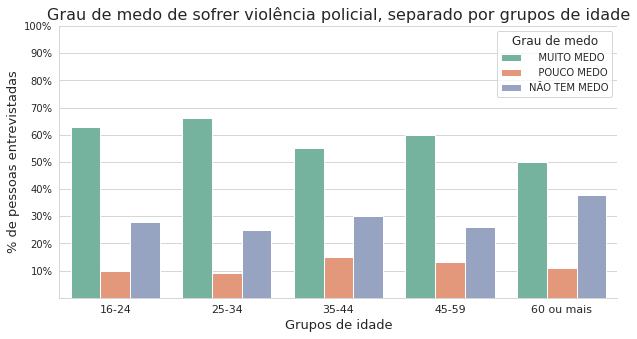

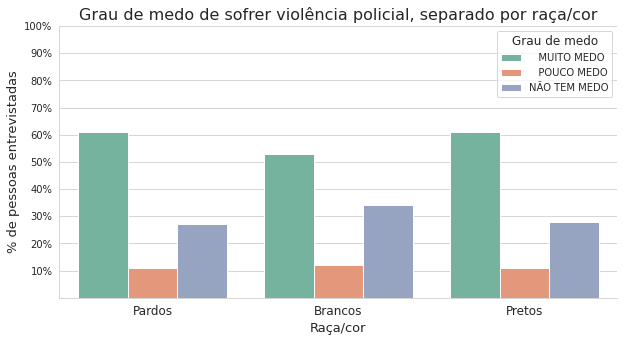

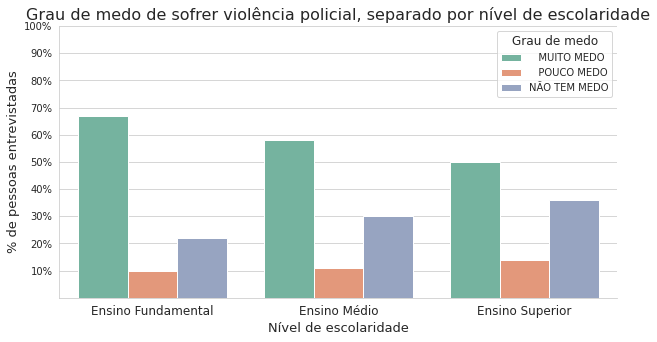

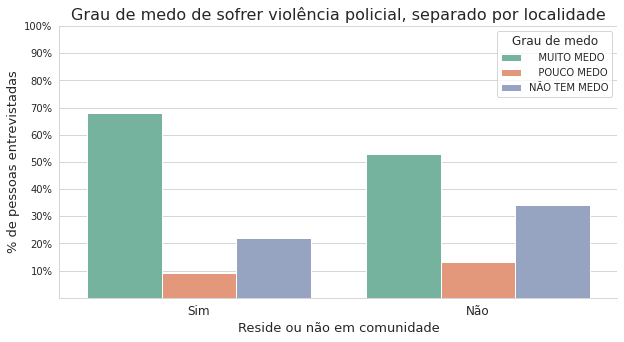

In [143]:
# Idade

grafico_idade(df=df_violencia_pol_id_melt, title='sofrer violência policial')

# Cor/Raça

grafico_cor(df=df_violencia_pol_cor_melt, title='sofrer violência policial')

# Escolaridade

grafico_escolaridade(df=df_violencia_pol_esc_melt, title='sofrer violência policial')

# Localidade
grafico_localidade(df=df_violencia_pol_com_melt, title='sofrer violência policial')

In [145]:
!zip -r /content/file.zip /content/Folder_To_Zip_ass

  adding: content/Folder_To_Zip_ass/ (stored 0%)
  adding: content/Folder_To_Zip_ass/graph_cor.png (deflated 13%)
  adding: content/Folder_To_Zip_ass/graph_com.png (deflated 13%)
  adding: content/Folder_To_Zip_ass/graph_idade.png (deflated 13%)
  adding: content/Folder_To_Zip_ass/graph_esc.png (deflated 13%)


In [146]:
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 'SER FERIDO OU MORTO EM UM ASSALTO OU ROUBO?'

In [127]:
#Criação de DataFrame

df_morte_roubo = selecao_df(pergunta ='SER FERIDO OU MORTO EM UM ASSALTO OU ROUBO?')
df_morte_roubo = df_morte_roubo.drop([176, 177, 178], axis=0)

# # DataFrame separado por idade

df_morte_roubo_idade = df_morte_roubo[['grau_medo', 'id_16_24', 'id_25_34', 'id_35_44', 'id_45_59', 'id_60_mais']]

# # # Aplicação da função de porcentagem

df_morte_roubo_idade = porcentagem(df_morte_roubo_idade, 'id_16_24')
df_morte_roubo_idade = porcentagem(df_morte_roubo_idade, 'id_25_34')
df_morte_roubo_idade = porcentagem(df_morte_roubo_idade, 'id_35_44')
df_morte_roubo_idade = porcentagem(df_morte_roubo_idade, 'id_45_59')
df_morte_roubo_idade = porcentagem(df_morte_roubo_idade, 'id_60_mais')

# # # Conversão de colunas em linhas

df_morte_roubo_id_melt = melted_df(df=df_morte_roubo_idade, var = 'idade')
df_morte_roubo_id_melt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,grau_medo,idade,valor
0,TEM MEDO,id_16_24,48.979592
1,MUITO MEDO,id_16_24,44.897959
2,POUCO MEDO,id_16_24,4.081633
3,NÃO TEM MEDO,id_16_24,2.040816
4,TEM MEDO,id_25_34,47.916667
5,MUITO MEDO,id_25_34,45.312500
6,POUCO MEDO,id_25_34,2.604167
7,NÃO TEM MEDO,id_25_34,4.166667
8,TEM MEDO,id_35_44,49.230769
9,MUITO MEDO,id_35_44,46.666667
